In [1]:
# 1ST MODULE -> COLLECTION OF STOCK DATA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df=pd.read_csv('TATASTEEL.NS (1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-17,39.529041,39.529041,38.509617,38.795437,13.962730,33279679.0
1,2012-10-18,39.005039,39.300385,38.662052,39.228931,14.118746,42712202.0
2,2012-10-19,39.062202,39.333733,38.604889,38.819256,13.971304,32476508.0
3,2012-10-22,38.604889,39.100311,38.404812,38.857365,13.985021,23557192.0
4,2012-10-23,38.490559,39.052673,38.457214,38.528667,13.866719,17672606.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2461,2022-10-10,102.000000,103.500000,101.150002,103.199997,103.199997,36641275.0
2462,2022-10-11,103.550003,103.650002,99.800003,100.349998,100.349998,41083734.0
2463,2022-10-12,100.349998,101.199997,99.000000,100.550003,100.550003,41357469.0
2464,2022-10-13,101.099998,101.800003,98.800003,100.099998,100.099998,34668093.0
2465,2022-10-14,101.849998,102.800003,99.900002,100.099998,100.099998,32456805.0


In [5]:
df.shape

(2466, 7)

In [6]:
df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df1=df.reset_index()['Close']

In [10]:
df1.shape

(2463,)

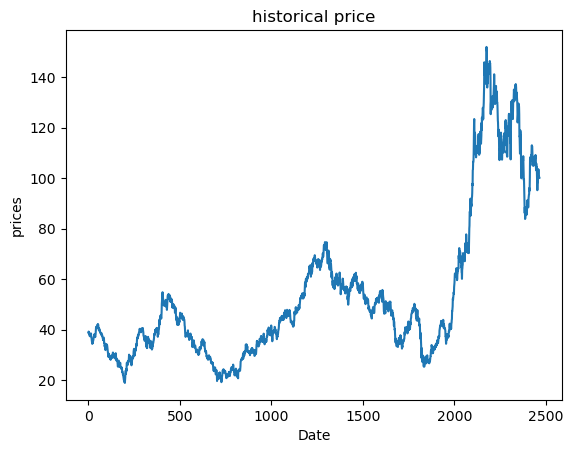

In [11]:
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('prices')
plt.show()

In [12]:
# 1ST MODULE DONE -----> COLLECTION OF STOCK DATA

In [13]:
# 2ND MODULE -> PREPROCESSING THE DATA (TRAINING AND TESTING)

In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df1

0        38.795437
1        39.228931
2        38.819256
3        38.857365
4        38.528667
           ...    
2458    103.199997
2459    100.349998
2460    100.550003
2461    100.099998
2462    100.099998
Name: Close, Length: 2463, dtype: float64

In [16]:
#Feature scaling to transform the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(2463, 1)

In [18]:
df1

array([[0.14962146],
       [0.15287954],
       [0.14980048],
       ...,
       [0.61376004],
       [0.61037787],
       [0.61037787]])

In [19]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1970, 493)

In [21]:
len(train_data), len(test_data)

(1970, 493)

In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX, dataY=[], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [23]:
#reshape into x=t,t+1,t+2,t+3 and y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.14962146 0.15287954 0.14980048 ... 0.11535782 0.11313802 0.11016636]
 [0.15287954 0.14980048 0.15008691 ... 0.11313802 0.11016636 0.11374667]
 [0.14980048 0.15008691 0.14761646 ... 0.11016636 0.11374667 0.1118491 ]
 ...
 [0.07445959 0.08013406 0.07990859 ... 0.13695397 0.13488709 0.14029851]
 [0.08013406 0.07990859 0.09494031 ... 0.13488709 0.14029851 0.13905839]
 [0.07990859 0.09494031 0.09809698 ... 0.14029851 0.13905839 0.15405252]]


In [25]:
print(X_test)

[[0.1617187  0.16592759 0.17629948 ... 0.40256437 0.3991447  0.41150826]
 [0.16592759 0.17629948 0.16498811 ... 0.3991447  0.41150826 0.40222617]
 [0.17629948 0.16498811 0.16694222 ... 0.41150826 0.40222617 0.38745754]
 ...
 [0.74509966 0.70143248 0.73784683 ... 0.63630762 0.63442865 0.63367702]
 [0.70143248 0.73784683 0.62687518 ... 0.63442865 0.63367702 0.61225683]
 [0.73784683 0.62687518 0.61439888 ... 0.63367702 0.61225683 0.61376004]]


In [26]:
print(Y_train)

[0.11374667 0.1118491  0.10816139 ... 0.13905839 0.15405252 0.15529264]


In [27]:
print(Y_test)

[0.40222617 0.38745754 0.38779574 0.4089529  0.41684451 0.41507829
 0.38625498 0.40154977 0.43439404 0.45930913 0.4682154  0.50669661
 0.51022908 0.50654633 0.51556534 0.54829686 0.5340919  0.49805337
 0.51868442 0.53311486 0.52713976 0.52548626 0.52995821 0.55055164
 0.55370829 0.56509481 0.59290353 0.58813093 0.63318853 0.63518023
 0.65829146 0.65761507 0.66235004 0.68546128 0.74667798 0.77223191
 0.78542222 0.74427291 0.70891078 0.72300301 0.74491175 0.73307429
 0.68858037 0.69463064 0.67877217 0.6886931  0.67136904 0.68226708
 0.68741542 0.70406307 0.68546128 0.70286051 0.70131975 0.70034271
 0.70635542 0.69312749 0.68553645 0.6956453  0.72863991 0.73348767
 0.74062771 0.71646419 0.68760333 0.67899769 0.68940712 0.69402941
 0.68486005 0.69466825 0.73382587 0.74791811 0.73931241 0.73484053
 0.73254818 0.71184196 0.72751252 0.73532901 0.77396053 0.7522397
 0.78951835 0.7801987  0.78155156 0.79353936 0.8019947  0.81890538
 0.80984876 0.78500885 0.81480926 0.82112255 0.83356128 0.85813

In [28]:
# 2ND MODULE DONE ----> PREPROCESSING THE DATA (TRAINING AND TESTING)

In [29]:
# 3RD MODULE -> ACCURACY OF DATA

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model_linear_regression=LinearRegression()

In [32]:
model_linear_regression.fit(X_train ,Y_train)

LinearRegression()

In [33]:
#Training dataset part
y_pred = model_linear_regression.predict(X_train)

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [35]:
print("Training Accuracy:",model_linear_regression.score(X_train,Y_train)*100)

Training Accuracy: 99.47639525100787


In [36]:
#Testing Dataset part
y1_test_pred=model_linear_regression.predict(X_test)

In [37]:
print("Testing Accuracy:",model_linear_regression.score(X_test,Y_test)*100)

Testing Accuracy: 96.71770975433826


In [38]:
print(X_train.shape), print(Y_train.shape)

(1869, 100)
(1869,)


(None, None)

In [39]:
print(X_test.shape), print(Y_test.shape)

(392, 100)
(392,)


(None, None)

In [40]:
# 3RD MODULE DONE ----> ACCURACY OF DATA

In [41]:
# 4TH MODULE -> CREATE RNN MODELS

In [45]:
# reshape input for required for LSTM AND CNN
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
# Importing libraries for creation of LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [47]:
#Defining network

# creation of LSTM model
#initializing the RNN MODEL(Sequential)
model_lstm=Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50))
#output layer
model_lstm.add(Dense(1))
#compiling network

#compile RNN model
model_lstm.compile(loss='mean_squared_error',optimizer='adam')

In [48]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
#Fit network

#Fit RNN model to the training set
model_lstm.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 11s 183ms/step - loss: 0.0050 - val_loss: 0.0085
Epoch 2/100
30/30 [==============================] - 4s 141ms/step - loss: 5.6068e-04 - val_loss: 0.0039
Epoch 3/100
30/30 [==============================] - 4s 133ms/step - loss: 4.0683e-04 - val_loss: 0.0040
Epoch 4/100
30/30 [==============================] - 4s 145ms/step - loss: 3.7673e-04 - val_loss: 0.0038
Epoch 5/100
30/30 [==============================] - 4s 137ms/step - loss: 3.5391e-04 - val_loss: 0.0035
Epoch 6/100
30/30 [==============================] - 4s 130ms/step - loss: 3.2587e-04 - val_loss: 0.0029
Epoch 7/100
30/30 [==============================] - 4s 132ms/step - loss: 3.0025e-04 - val_loss: 0.0030
Epoch 8/100
30/30 [==============================] - 4s 149ms/step - loss: 3.1269e-04 - val_loss: 0.0028
Epoch 9/100
30/30 [==============================] - 5s 150ms/step - loss: 2.9294e-04 - val_loss: 0.0027
Epoch 10/100
30/30 [==============================] - 6s 1

30/30 [==============================] - 4s 139ms/step - loss: 5.8371e-05 - val_loss: 8.8340e-04
Epoch 78/100
30/30 [==============================] - 4s 148ms/step - loss: 5.9945e-05 - val_loss: 6.0301e-04
Epoch 79/100
30/30 [==============================] - 5s 150ms/step - loss: 5.7469e-05 - val_loss: 6.2172e-04
Epoch 80/100
30/30 [==============================] - 4s 132ms/step - loss: 5.6710e-05 - val_loss: 6.5296e-04
Epoch 81/100
30/30 [==============================] - 4s 128ms/step - loss: 5.8063e-05 - val_loss: 6.8760e-04
Epoch 82/100
30/30 [==============================] - 4s 132ms/step - loss: 5.6382e-05 - val_loss: 8.1537e-04
Epoch 83/100
30/30 [==============================] - 5s 157ms/step - loss: 5.5124e-05 - val_loss: 7.9539e-04
Epoch 84/100
30/30 [==============================] - 4s 136ms/step - loss: 5.5509e-05 - val_loss: 9.8271e-04
Epoch 85/100
30/30 [==============================] - 4s 129ms/step - loss: 5.3918e-05 - val_loss: 8.5473e-04
Epoch 86/100
30/30 [===

In [50]:
import matplotlib.pyplot as plt

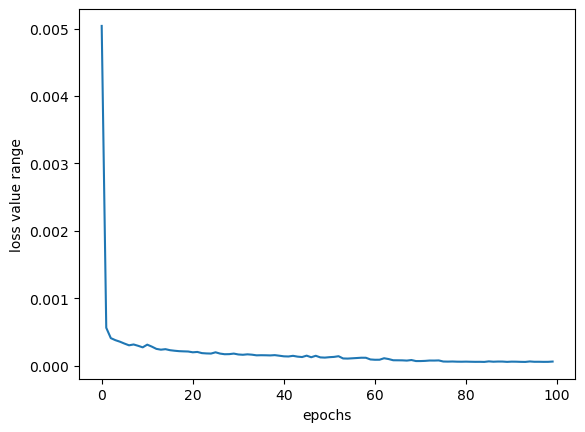

In [51]:
#Evaluate network

# loss value of LSTM model
loss_per_epoch = model_lstm.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('epochs')
plt.ylabel('loss value range')
plt.show()

In [52]:
history = model_lstm.history.history

In [53]:
for key in history.keys():
  print(key)

loss
val_loss


In [54]:
def plot_metrics(history):

  train_loss = history['loss']
  val_loss = history['val_loss']

  #loss
  plt.figure()
  plt.plot(train_loss, label='Training loss')
  plt.plot(val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.ylabel('validation loss range')
  plt.legend()
  plt.show()

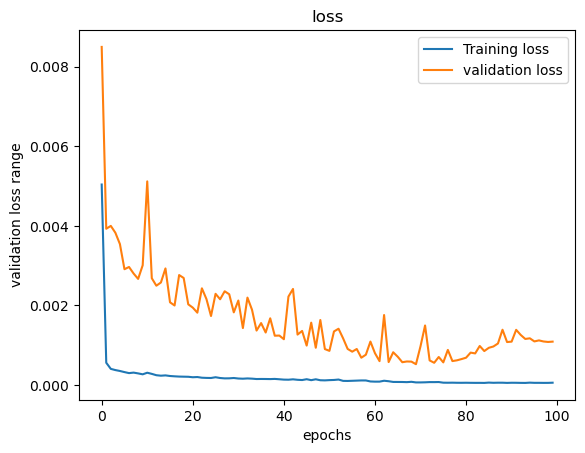

In [55]:
plot_metrics(history)

In [56]:
#Make prediction

#Lets do the prediction and check the performance metrics for LSTM
test_predict_lstm=model_lstm.predict(X_test)

13/13 [==============================] - 1s 25ms/step


In [57]:
# transform back to original form
test_predictlstm=scaler.inverse_transform(test_predict_lstm)

In [58]:
# Calculate RMSE performance metrics for LSTM
import math
from sklearn.metrics import mean_squared_error

In [59]:
# Test data RMSE for LSTM
math.sqrt(mean_squared_error(Y_test,test_predictlstm))

115.28763790466337

In [64]:
# Importing libraries for creation of CNN model
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D

In [65]:
#Defining network

# creation of CNN model
#Initializing the RNN(sequential)
model_cnn=Sequential()
model_cnn.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(100,1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
#Output layer
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dense(200, activation='relu'))
model_cnn.add(Dense(1))
#Compile network

#compile RNN model
model_cnn.compile(optimizer='adam', loss='mse')

In [66]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 256)           768       
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 256)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 1000)              12545000  
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                      

In [67]:
#Fit network

#Fit RNN model to the training set
model_cnn.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
30/30 [==============================] - 7s 217ms/step - loss: 0.0116 - val_loss: 0.0093
Epoch 2/100
30/30 [==============================] - 7s 239ms/step - loss: 4.9333e-04 - val_loss: 0.0158
Epoch 3/100
30/30 [==============================] - 8s 259ms/step - loss: 4.8425e-04 - val_loss: 0.0038
Epoch 4/100
30/30 [==============================] - 7s 226ms/step - loss: 4.0354e-04 - val_loss: 0.0032
Epoch 5/100
30/30 [==============================] - 8s 256ms/step - loss: 3.7122e-04 - val_loss: 0.0261
Epoch 6/100
30/30 [==============================] - 7s 218ms/step - loss: 5.0445e-04 - val_loss: 0.0031
Epoch 7/100
30/30 [==============================] - 7s 218ms/step - loss: 2.3235e-04 - val_loss: 0.0027
Epoch 8/100
30/30 [==============================] - 6s 207ms/step - loss: 2.0967e-04 - val_loss: 0.0027
Epoch 9/100
30/30 [==============================] - 7s 218ms/step - loss: 3.7902e-04 - val_loss: 0.0216
Epoch 10/100
30/30 [==============================] - 6s 20

30/30 [==============================] - 7s 218ms/step - loss: 1.6712e-04 - val_loss: 0.0057
Epoch 79/100
30/30 [==============================] - 6s 207ms/step - loss: 1.6569e-04 - val_loss: 0.0031
Epoch 80/100
30/30 [==============================] - 6s 216ms/step - loss: 1.2592e-04 - val_loss: 0.0039
Epoch 81/100
30/30 [==============================] - 6s 207ms/step - loss: 1.0345e-04 - val_loss: 0.0032
Epoch 82/100
30/30 [==============================] - 6s 214ms/step - loss: 1.0309e-04 - val_loss: 0.0034
Epoch 83/100
30/30 [==============================] - 6s 217ms/step - loss: 1.1288e-04 - val_loss: 0.0059
Epoch 84/100
30/30 [==============================] - 6s 210ms/step - loss: 1.0656e-04 - val_loss: 0.0032
Epoch 85/100
30/30 [==============================] - 7s 221ms/step - loss: 1.3563e-04 - val_loss: 0.0028
Epoch 86/100
30/30 [==============================] - 7s 216ms/step - loss: 1.1508e-04 - val_loss: 0.0031
Epoch 87/100
30/30 [==============================] - 7s 22

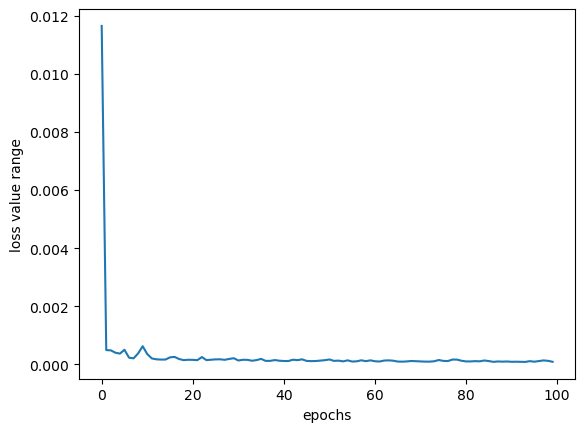

In [68]:
#Evaluate network

#Loss value of CNN model
loss_per_epoch = model_cnn.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('epochs')
plt.ylabel('loss value range')
plt.show()

In [69]:
history = model_cnn.history.history

In [70]:
for key in history.keys():
  print(key)

loss
val_loss


In [71]:
def plot_metrics(history):

  train_loss = history['loss']
  val_loss = history['val_loss']

  #loss
  plt.figure()
  plt.plot(train_loss, label='Training loss')
  plt.plot(val_loss, label='validation loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.ylabel('validation loss range')
  plt.legend()
  plt.show()

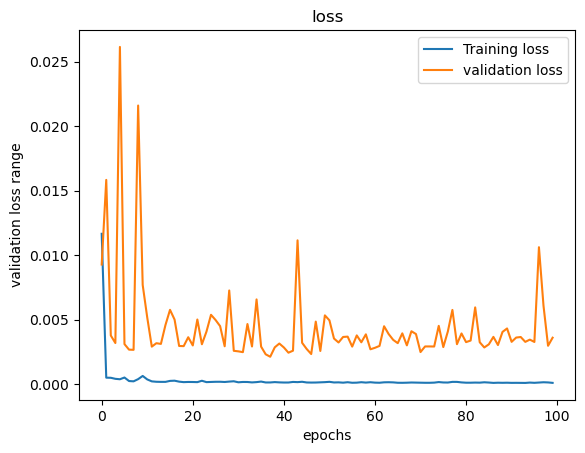

In [72]:
plot_metrics(history)

In [73]:
# 4TH MODULE DONE ----> CREATE RNN MODELS

In [74]:
# 5TH MODULE -> PREDICTING THE FUTURE VALUE

In [75]:
#Make prediction

#Lets do the prediction and check the performance metrics for CNN
test_predict_cnn=model_cnn.predict(X_test)

13/13 [==============================] - 0s 17ms/step


In [76]:
# transform back to original form
test_predictcnn=scaler.inverse_transform(test_predict_cnn)

In [77]:
# Calculate RMSE performance metrics CNN
import math
from sklearn.metrics import mean_squared_error

In [78]:
# Test data RMSE for CNN
math.sqrt(mean_squared_error(Y_test,test_predictcnn))

113.10658998129965

In [79]:
RMSE_compare=pd.DataFrame({'Models':['LSTM MODEL','CNN MODEL'],'RMSE':[math.sqrt(mean_squared_error(Y_test,test_predictlstm)),math.sqrt(mean_squared_error(Y_test,test_predictcnn))]})

In [80]:
RMSE_compare

,Models,RMSE
0,LSTM MODEL,115.287638
1,CNN MODEL,113.106590


In [81]:
len(test_data)

493

In [82]:
a=len(test_data)-time_step

In [83]:
#Taking previous 100 days values
x_input=test_data[a:].reshape(1,-1)
x_input.shape

(1, 100)

In [84]:
#Converting the values to list
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [85]:
#previous 100 days Test data
temp_input

[0.614398881640261,
 0.6089498992874968,
 0.6487087379370472,
 0.6423202657607553,
 0.6452890674322822,
 0.6514520638547336,
 0.6573895995550613,
 0.6709181147220636,
 0.6602080464780687,
 0.6683251360370382,
 0.6611099119141389,
 0.6748263911854013,
 0.6433349292006134,
 0.6274389035865677,
 0.603576030424195,
 0.6067326759462467,
 0.5792246640411268,
 0.5357453927787633,
 0.5395033220094401,
 0.5054564906953674,
 0.5230436295583683,
 0.4879445329645552,
 0.49034960015633,
 0.49903046929020245,
 0.5103042569822326,
 0.5186092430027359,
 0.5206385623665936,
 0.5097029732736074,
 0.5140621862129093,
 0.5003081501969155,
 0.5045170083876982,
 0.5030138592430029,
 0.5344677118720501,
 0.5238703213781079,
 0.5440504464419927,
 0.5360460346330759,
 0.538112910741665,
 0.5404804211887083,
 0.5222919986170822,
 0.5376995310104321,
 0.5490860565793825,
 0.5558503367104591,
 0.5602471063944925,
 0.5615624041728047,
 0.5800889727324655,
 0.5716711887081743,
 0.5791119261642066,
 0.61225683191534

In [86]:
# demonstrate prediction for next 30 days in LSTM
from numpy import array
lst_outputlstm=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model_lstm.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_outputlstm.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model_lstm.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_outputlstm.extend(yhat.tolist())
    i=i+1
print(lst_outputlstm)

[0.61793923]
101
1 day input [0.6089499  0.64870874 0.64232027 0.64528907 0.65145206 0.6573896
 0.67091811 0.66020805 0.66832514 0.66110991 0.67482639 0.64333493
 0.6274389  0.60357603 0.60673268 0.57922466 0.53574539 0.53950332
 0.50545649 0.52304363 0.48794453 0.4903496  0.49903047 0.51030426
 0.51860924 0.52063856 0.50970297 0.51406219 0.50030815 0.50451701
 0.50301386 0.53446771 0.52387032 0.54405045 0.53604603 0.53811291
 0.54048042 0.522292   0.53769953 0.54908606 0.55585034 0.56024711
 0.5615624  0.58008897 0.57167119 0.57911193 0.61225683 0.66674681
 0.67163213 0.66223731 0.66261312 0.66749838 0.66486784 0.66374045
 0.67877217 0.67802059 0.70470192 0.70733246 0.70357453 0.70395034
 0.6851607  0.6475814  0.66674681 0.65885519 0.65660041 0.66486784
 0.64607819 0.67200794 0.65772781 0.65096352 0.66148573 0.67426266
 0.66674681 0.65359405 0.65246667 0.6678742  0.6678742  0.67839642
 0.66223731 0.65246667 0.63292544 0.6532183  0.64307184 0.63668337
 0.64194451 0.6084989  0.59196404 

9 day output [[0.6261711]]
10 day input [0.66110991 0.67482639 0.64333493 0.6274389  0.60357603 0.60673268
 0.57922466 0.53574539 0.53950332 0.50545649 0.52304363 0.48794453
 0.4903496  0.49903047 0.51030426 0.51860924 0.52063856 0.50970297
 0.51406219 0.50030815 0.50451701 0.50301386 0.53446771 0.52387032
 0.54405045 0.53604603 0.53811291 0.54048042 0.522292   0.53769953
 0.54908606 0.55585034 0.56024711 0.5615624  0.58008897 0.57167119
 0.57911193 0.61225683 0.66674681 0.67163213 0.66223731 0.66261312
 0.66749838 0.66486784 0.66374045 0.67877217 0.67802059 0.70470192
 0.70733246 0.70357453 0.70395034 0.6851607  0.6475814  0.66674681
 0.65885519 0.65660041 0.66486784 0.64607819 0.67200794 0.65772781
 0.65096352 0.66148573 0.67426266 0.66674681 0.65359405 0.65246667
 0.6678742  0.6678742  0.67839642 0.66223731 0.65246667 0.63292544
 0.6532183  0.64307184 0.63668337 0.64194451 0.6084989  0.59196404
 0.57355015 0.58595133 0.60436522 0.59722511 0.61826955 0.63630762
 0.63442865 0.63367702

17 day output [[0.6307864]]
18 day input [0.53950332 0.50545649 0.52304363 0.48794453 0.4903496  0.49903047
 0.51030426 0.51860924 0.52063856 0.50970297 0.51406219 0.50030815
 0.50451701 0.50301386 0.53446771 0.52387032 0.54405045 0.53604603
 0.53811291 0.54048042 0.522292   0.53769953 0.54908606 0.55585034
 0.56024711 0.5615624  0.58008897 0.57167119 0.57911193 0.61225683
 0.66674681 0.67163213 0.66223731 0.66261312 0.66749838 0.66486784
 0.66374045 0.67877217 0.67802059 0.70470192 0.70733246 0.70357453
 0.70395034 0.6851607  0.6475814  0.66674681 0.65885519 0.65660041
 0.66486784 0.64607819 0.67200794 0.65772781 0.65096352 0.66148573
 0.67426266 0.66674681 0.65359405 0.65246667 0.6678742  0.6678742
 0.67839642 0.66223731 0.65246667 0.63292544 0.6532183  0.64307184
 0.63668337 0.64194451 0.6084989  0.59196404 0.57355015 0.58595133
 0.60436522 0.59722511 0.61826955 0.63630762 0.63442865 0.63367702
 0.61225683 0.61376004 0.61037787 0.61037787 0.61793923 0.62258649
 0.62550557 0.62652373

25 day output [[0.6345326]]
26 day input [0.52063856 0.50970297 0.51406219 0.50030815 0.50451701 0.50301386
 0.53446771 0.52387032 0.54405045 0.53604603 0.53811291 0.54048042
 0.522292   0.53769953 0.54908606 0.55585034 0.56024711 0.5615624
 0.58008897 0.57167119 0.57911193 0.61225683 0.66674681 0.67163213
 0.66223731 0.66261312 0.66749838 0.66486784 0.66374045 0.67877217
 0.67802059 0.70470192 0.70733246 0.70357453 0.70395034 0.6851607
 0.6475814  0.66674681 0.65885519 0.65660041 0.66486784 0.64607819
 0.67200794 0.65772781 0.65096352 0.66148573 0.67426266 0.66674681
 0.65359405 0.65246667 0.6678742  0.6678742  0.67839642 0.66223731
 0.65246667 0.63292544 0.6532183  0.64307184 0.63668337 0.64194451
 0.6084989  0.59196404 0.57355015 0.58595133 0.60436522 0.59722511
 0.61826955 0.63630762 0.63442865 0.63367702 0.61225683 0.61376004
 0.61037787 0.61037787 0.61793923 0.62258649 0.62550557 0.62652373
 0.62614572 0.62526405 0.62462437 0.62460101 0.62519503 0.62617111
 0.62723219 0.62815261 

In [87]:
# demonstrate prediction for next 30 days in CNN
from numpy import array
lst_outputcnn=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model_cnn.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_outputcnn.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model_cnn.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_outputcnn.extend(yhat.tolist())
    i=i+1
print(lst_outputcnn)

0 day input [0.50451701 0.50301386 0.53446771 0.52387032 0.54405045 0.53604603
 0.53811291 0.54048042 0.522292   0.53769953 0.54908606 0.55585034
 0.56024711 0.5615624  0.58008897 0.57167119 0.57911193 0.61225683
 0.66674681 0.67163213 0.66223731 0.66261312 0.66749838 0.66486784
 0.66374045 0.67877217 0.67802059 0.70470192 0.70733246 0.70357453
 0.70395034 0.6851607  0.6475814  0.66674681 0.65885519 0.65660041
 0.66486784 0.64607819 0.67200794 0.65772781 0.65096352 0.66148573
 0.67426266 0.66674681 0.65359405 0.65246667 0.6678742  0.6678742
 0.67839642 0.66223731 0.65246667 0.63292544 0.6532183  0.64307184
 0.63668337 0.64194451 0.6084989  0.59196404 0.57355015 0.58595133
 0.60436522 0.59722511 0.61826955 0.63630762 0.63442865 0.63367702
 0.61225683 0.61376004 0.61037787 0.61037787 0.61793923 0.62258649
 0.62550557 0.62652373 0.62614572 0.62526405 0.62462437 0.62460101
 0.62519503 0.62617111 0.62723219 0.62815261 0.62883615 0.62930596
 0.6296525  0.62997591 0.63034594 0.63078642 0.6312

9 day output [[0.566708]]
10 day input [0.54908606 0.55585034 0.56024711 0.5615624  0.58008897 0.57167119
 0.57911193 0.61225683 0.66674681 0.67163213 0.66223731 0.66261312
 0.66749838 0.66486784 0.66374045 0.67877217 0.67802059 0.70470192
 0.70733246 0.70357453 0.70395034 0.6851607  0.6475814  0.66674681
 0.65885519 0.65660041 0.66486784 0.64607819 0.67200794 0.65772781
 0.65096352 0.66148573 0.67426266 0.66674681 0.65359405 0.65246667
 0.6678742  0.6678742  0.67839642 0.66223731 0.65246667 0.63292544
 0.6532183  0.64307184 0.63668337 0.64194451 0.6084989  0.59196404
 0.57355015 0.58595133 0.60436522 0.59722511 0.61826955 0.63630762
 0.63442865 0.63367702 0.61225683 0.61376004 0.61037787 0.61037787
 0.61793923 0.62258649 0.62550557 0.62652373 0.62614572 0.62526405
 0.62462437 0.62460101 0.62519503 0.62617111 0.62723219 0.62815261
 0.62883615 0.62930596 0.6296525  0.62997591 0.63034594 0.63078642
 0.63128388 0.63180637 0.63232172 0.63281012 0.63326693 0.6336987
 0.63411713 0.63453257 0

19 day output [[0.5541929]]
20 day input [0.66223731 0.66261312 0.66749838 0.66486784 0.66374045 0.67877217
 0.67802059 0.70470192 0.70733246 0.70357453 0.70395034 0.6851607
 0.6475814  0.66674681 0.65885519 0.65660041 0.66486784 0.64607819
 0.67200794 0.65772781 0.65096352 0.66148573 0.67426266 0.66674681
 0.65359405 0.65246667 0.6678742  0.6678742  0.67839642 0.66223731
 0.65246667 0.63292544 0.6532183  0.64307184 0.63668337 0.64194451
 0.6084989  0.59196404 0.57355015 0.58595133 0.60436522 0.59722511
 0.61826955 0.63630762 0.63442865 0.63367702 0.61225683 0.61376004
 0.61037787 0.61037787 0.61793923 0.62258649 0.62550557 0.62652373
 0.62614572 0.62526405 0.62462437 0.62460101 0.62519503 0.62617111
 0.62723219 0.62815261 0.62883615 0.62930596 0.6296525  0.62997591
 0.63034594 0.63078642 0.63128388 0.63180637 0.63232172 0.63281012
 0.63326693 0.6336987  0.63411713 0.63453257 0.6349504  0.63537133
 0.63579214 0.63620901 0.59176081 0.59142596 0.58652306 0.57888067
 0.57914996 0.57617986

29 day output [[0.5452654]]
[[0.5917608141899109], [0.5914259552955627], [0.5865230560302734], [0.5788806676864624], [0.5791499614715576], [0.5761798620223999], [0.5746247172355652], [0.5713955760002136], [0.5692315697669983], [0.5667080283164978], [0.5630460381507874], [0.5612059235572815], [0.5581985116004944], [0.5571577548980713], [0.5564749240875244], [0.5574151873588562], [0.5586256980895996], [0.5578528642654419], [0.5557882785797119], [0.5541929006576538], [0.5533168911933899], [0.5524194240570068], [0.5516712069511414], [0.550506591796875], [0.5494715571403503], [0.5475842952728271], [0.5465164184570312], [0.546344518661499], [0.5456042289733887], [0.5452653765678406]]


In [88]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [89]:
len(df1)

2463

In [90]:
b=len(df1)-time_step

In [91]:
df2=df1.tolist()
df2.extend(lst_outputlstm)

In [92]:
df3=df1.tolist()
df3.extend(lst_outputcnn)

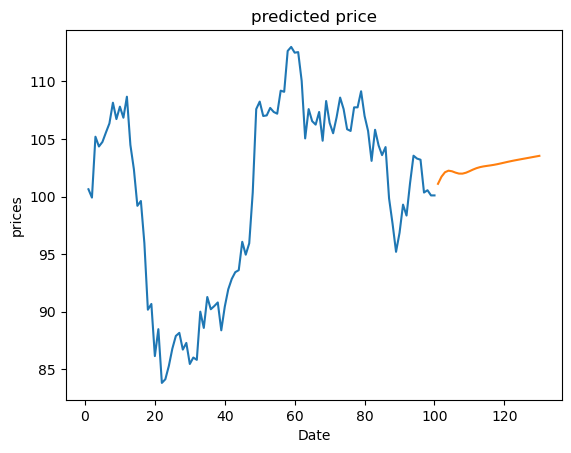

In [93]:
# PLOTTING REPRESENTATION THROUGH LSTM
plt.plot(day_new,scaler.inverse_transform(df1[b:]))
plt.plot(day_pred,scaler.inverse_transform(lst_outputlstm))
plt.title('predicted price')
plt.xlabel('Date')
plt.ylabel('prices')
plt.show()

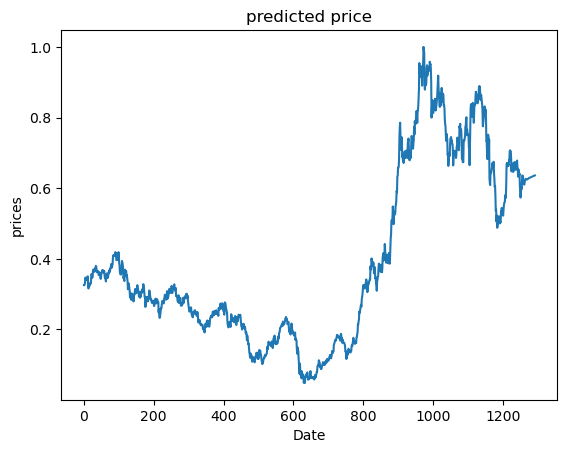

In [94]:
df2=df1.tolist()
df2.extend(lst_outputlstm)
plt.plot(df2[1200:])
plt.title('predicted price')
plt.xlabel('Date')
plt.ylabel('prices')
plt.show()

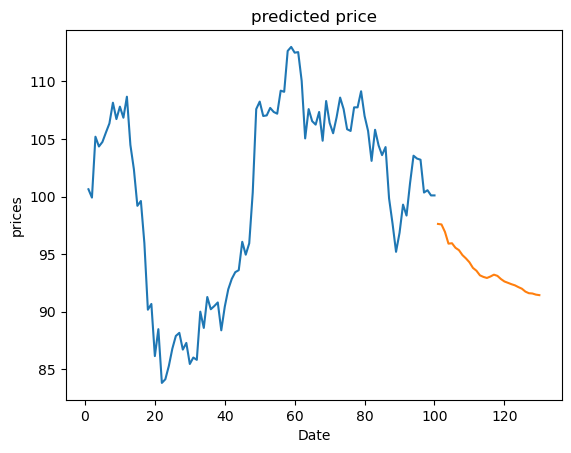

In [95]:
# PLOTTING REPRESENTATION THROUGH CNN
plt.plot(day_new,scaler.inverse_transform(df1[b:]))
plt.plot(day_pred,scaler.inverse_transform(lst_outputcnn))
plt.title('predicted price')
plt.xlabel('Date')
plt.ylabel('prices')
plt.show()

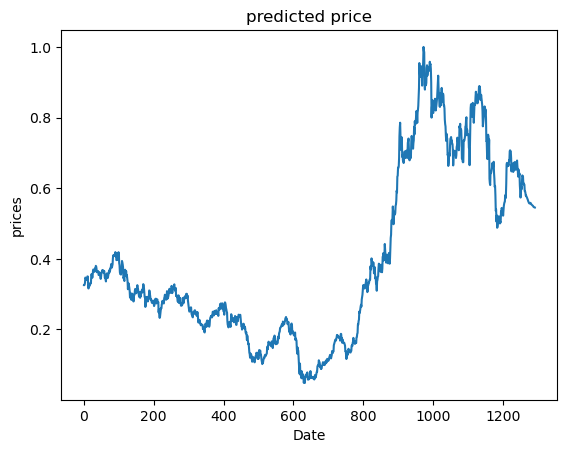

In [96]:
df3=df1.tolist()
df3.extend(lst_outputcnn)
plt.plot(df3[1200:])
plt.title('predicted price')
plt.xlabel('Date')
plt.ylabel('prices')
plt.show()

In [97]:
# 5TH MODULE DONE -----> PREDICTING THE FUTURE VALUE